# Library import

In [41]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from PIL import Image
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('matplotlib version : ', mpl.__version__)
print('seaborn version : ', sns.__version__)

pandas version :  1.1.5
numpy version :  1.19.2
matplotlib version :  3.2.1
seaborn version :  0.11.0


In [3]:
# 학습 데이터셋 폴더 경로를 지정해주세요.
train_dir = '/opt/ml/input/data/train'
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'

# Data load

In [4]:
train_info = pd.read_csv(os.path.join(train_dir, 'train.csv'))
test = pd.read_csv(os.path.join(test_dir, 'info.csv'))

## Dataset Head

In [5]:
train_info.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [6]:
test.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0


## Dataset Shape

In [7]:
train_info.shape

(2700, 5)

## Dataset Size

In [8]:
print(f'Trianing Info Shape: {train_info.shape}')
print(f'Traning Image Data: {train_info.shape[0] * 7}')
print(f'Test Dataset Shape: {test.shape}')

Trianing Info Shape: (2700, 5)
Traning Image Data: 18900
Test Dataset Shape: (12600, 2)


## train_info data information

In [9]:
train_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


# Train_info Dataset columns Visualize

## 성별 비율

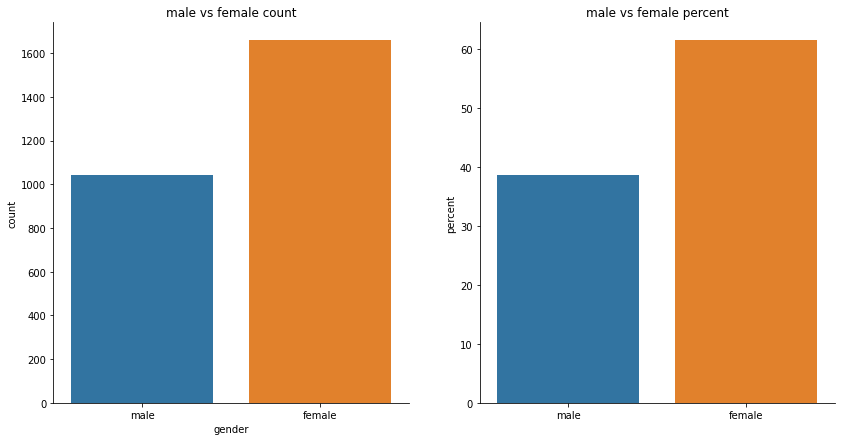

In [10]:
gender_rate = train_info['gender'].value_counts() / len(train_info) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes.flatten()

sns.countplot(x='gender', data=train_info, ax=axes[0],
              order=['male', 'female'])
axes[0].set_title('male vs female count')

sns.barplot(gender_rate.index, gender_rate, ax=axes[1],
            order=['male', 'female'])
axes[1].set_title('male vs female percent')
axes[1].set_ylabel('percent')

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [11]:
print(f"male 수: {train_info['gender'].value_counts()[1]}명 ({gender_rate[1]:.2f}%)")
print(f"female 수: {train_info['gender'].value_counts()[0]}명 ({gender_rate[0]:.2f}%)")
print(f"female 의 수가 male 의 수보다 {gender_rate[0] / gender_rate[1]:.2f}배")

male 수: 1042명 (38.59%)
female 수: 1658명 (61.41%)
female 의 수가 male 의 수보다 1.59배


## 나이대

In [12]:
train_info['age_band'] = train_info['age'].apply(lambda x: "10's" if x < 20 else "20's"
                                                 if x < 30 else "30's" if x < 40 else "40's"
                                                 if x < 50 else "50's" if x < 60 else "60's over")

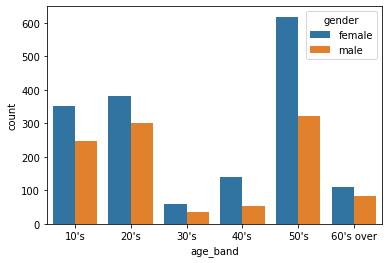

In [13]:
sns.countplot(x='age_band', data=train_info,
              hue='gender',
              order=sorted(train_info['age_band'].unique()))
plt.show()

전체적으로 여성의 비율이 남성의 비율보다 높다.

30대 40대의 사진은 유난히 부족하다.

50대는 여성의 비율이 거의 2배다.

## 실제 target 에서는 `~ 29`, `30 ~ 59`, `60 ~` 으로 나이대를 분류

In [14]:
train_info['age_band'] = train_info['age'].apply(lambda x: "< 30" if x < 30 else ">= 30 and < 60" if x < 60 else ">= 60")

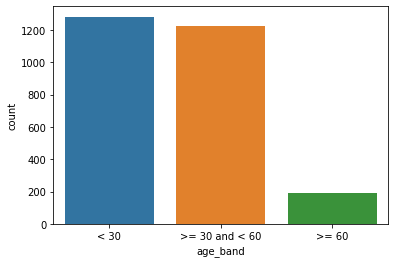

In [15]:
sns.countplot(x='age_band', data=train_info,
              order=sorted(train_info['age_band'].unique()))
plt.show()

In [16]:
train_info['age_band'].value_counts()

< 30              1281
>= 30 and < 60    1227
>= 60              192
Name: age_band, dtype: int64

30세 미만이 1281명으로 가장 많고 30~59세가 1227명으로 2번째, 그리고 60대이상은 192명이다.

In [17]:
train_info['age_band'].value_counts() / len(train_info) * 100

< 30              47.444444
>= 30 and < 60    45.444444
>= 60              7.111111
Name: age_band, dtype: float64

비율은 47.45%, 45.45% 7.11%로 60대 이상이 상당히 적은 비율이라서 이걸 어떻게 해결하면 좋을까?

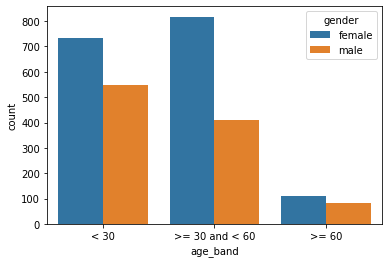

In [18]:
sns.countplot(x='age_band', data=train_info,
              hue='gender',
              order=sorted(train_info['age_band'].unique()))
plt.show()

전체적으로 남성보다 여성의 비율이 높다.

## 특이사항

## Column-wise Unique Values

In [19]:
for col in train_info.columns:
    print(col + ':' + str(len(train_info[col].unique())))

id:2699
gender:2
race:1
age:43
path:2700
age_band:3


2700개의 row를 가지는데 id값이 2699개로 동일한 ID가 존재

race가 1개로 모두 'Asian' 이다. -> 의미를 가질 수 없을 듯

age는 모두 43개로 모든 나이를 커버하진 않음

In [20]:
[path for path in train_info['path'] if '003397' in path]

['003397_female_Asian_20', '003397_female_Asian_19']

같은 ID 003397 을 가지는 다른 사람 발견!

## Train Images

%%time
fig, axes = plt.subplots(5, 7, figsize=(15, 15))

sample_idx = np.random.randint(0, train_info.shape[0], 5)
for i, idx in enumerate(sample_idx):
    folder_path = os.path.join('images/' + train_info.iloc[idx].path + '/*')
    file_list = sorted(glob.glob(os.path.join(train_dir, folder_path)))
    for j, file_name in enumerate(file_list):
        img = plt.imread(file_name)
        axes[i][j].imshow(img)
        axes[i][j].set_title(file_name.split('/')[-1].split('.')[0])
        axes[i][j].axis('off')

plt.show()

## Test Images

%%time
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
axes.flatten()

sample_idx = np.random.randint(0, test.shape[0], 5)
for i, idx in enumerate(sample_idx):
    images_path = os.path.join('images/' + test.iloc[idx].ImageID)
    file_name = os.path.join(test_dir, images_path)
    
    img = plt.imread(file_name)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()

## Image Size

In [23]:
sample_idx = np.random.randint(0, train_info.shape[0], 1)
for i, idx in enumerate(sample_idx):
    folder_path = os.path.join('images/' + train_info.iloc[idx].path + '/*')
    file_list = sorted(glob.glob(os.path.join(train_dir, folder_path)))
    for j, file_name in enumerate(file_list):
        img = plt.imread(file_name)
        print(file_name.split('/')[-1].split('.')[0])
        print(img.shape)

incorrect_mask
(512, 384, 3)
mask1
(512, 384, 3)
mask2
(512, 384, 3)
mask3
(512, 384, 3)
mask4
(512, 384, 3)
mask5
(512, 384, 3)
normal
(512, 384, 3)


**Train Image shape (512, 384, 3)**

In [24]:
sample_idx = np.random.randint(0, test.shape[0], 1)
for i, idx in enumerate(sample_idx):
    images_path = os.path.join('images/' + test.iloc[idx].ImageID)
    file_name = os.path.join(test_dir, images_path)
    
    img = plt.imread(file_name)
    print(img.shape)

(512, 384, 3)


**Test Image shape (512, 384, 3)**

> Image size 는 모두 동일하다.

## Labeling

![image.png](target_info.png)
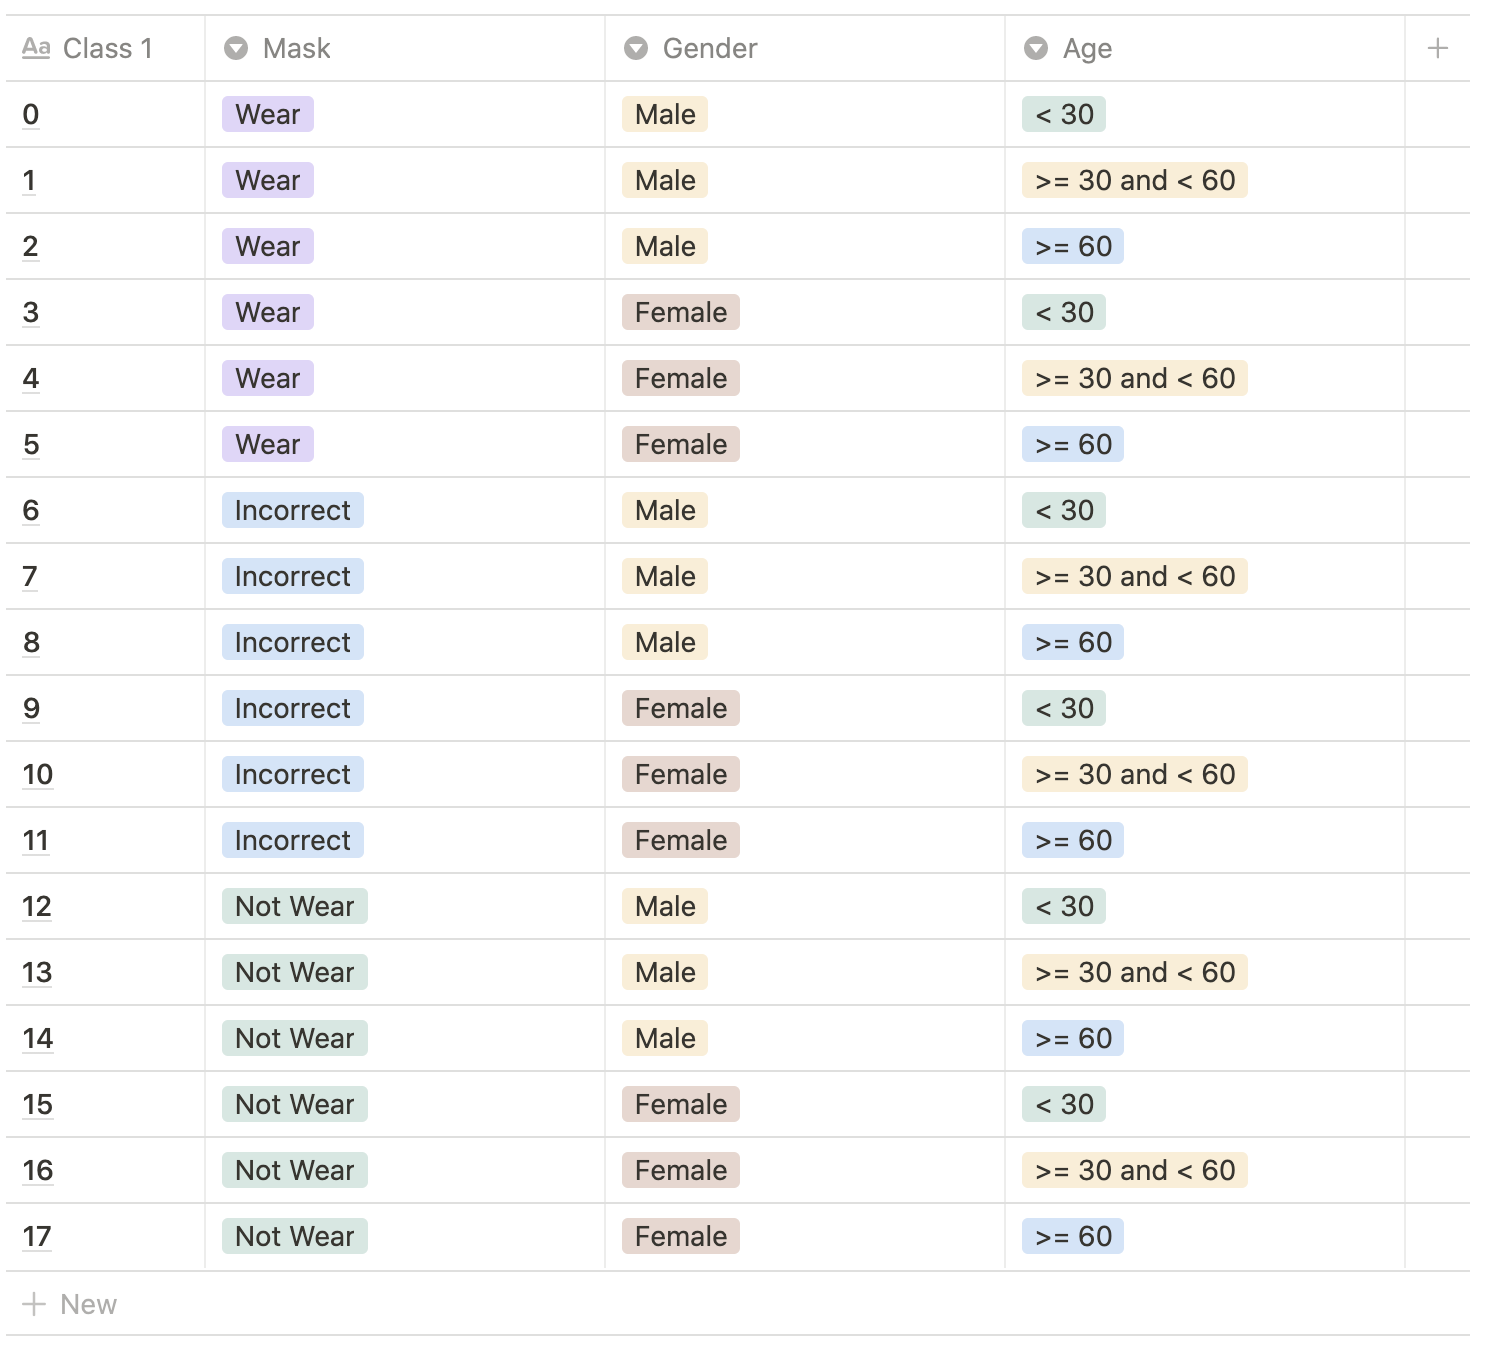

In [25]:
train_info.head()

,id,gender,race,age,path,age_band
0,000001,female,Asian,45,000001_female_Asian_45,>= 30 and < 60
1,000002,female,Asian,52,000002_female_Asian_52,>= 30 and < 60
2,000004,male,Asian,54,000004_male_Asian_54,>= 30 and < 60
3,000005,female,Asian,58,000005_female_Asian_58,>= 30 and < 60
4,000006,female,Asian,59,000006_female_Asian_59,>= 30 and < 60


In [63]:
image_df_list = []
images_dir = os.path.join(train_dir, 'images')
for idx in tqdm(train_info.index):
    image_df = pd.DataFrame()
    folder_dir = os.path.join(images_dir, train_info.iloc[idx].path)
    file_list = glob.glob(folder_dir + '/*')
    image_df['mask'] = ['Incorrect' if 'incorrect' in file.split('/')[-1].split('.')[0] else 'Not Wear' 
                        if 'normal' in file.split('/')[-1].split('.')[0] else 'Wear' 
                        for file in file_list]
    image_df['path'] = folder_dir.split('/')[-1]
    image_df['image_path'] = file_list
    image_df_list.append(image_df)
image_df = pd.concat(image_df_list)
image_df.head()

100%|██████████| 2700/2700 [00:04<00:00, 573.55it/s]


,mask,path,image_path
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...
...,...,...,...
2,Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...
3,Not Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...
4,Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...
5,Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...


In [64]:
train = pd.merge(image_df, train_info, how='left',
                 on='path')
train.head()

,mask,path,image_path,id,gender,race,age,age_band
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60


In [66]:
train.shape

(18900, 8)

In [67]:
train.sort_values('id')

,mask,path,image_path,id,gender,race,age,age_band
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60
...,...,...,...,...,...,...,...,...
18894,Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...,006959,male,Asian,19,< 30
18895,Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...,006959,male,Asian,19,< 30
18896,Not Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...,006959,male,Asian,19,< 30
18897,Wear,006959_male_Asian_19,/opt/ml/input/data/train/images/006959_male_As...,006959,male,Asian,19,< 30


In [75]:
def get_label(row):
    if row['mask'] == 'Wear':
        if row['gender'] == 'male':
            if row['age_band'] == '< 30':
                return 0
            elif row['age_band'] == '>= 30 and < 60':
                return 1
            else:
                return 2
        else:
            if row['age_band'] == '< 30':
                return 3
            elif row['age_band'] == '>= 30 and < 60':
                return 4
            else:
                return 5
    elif row['mask'] == 'Incorrect':
        if row['gender'] == 'male':
            if row['age_band'] == '< 30':
                return 6
            elif row['age_band'] == '>= 30 and < 60':
                return 7
            else:
                return 8
        else:
            if row['age_band'] == '< 30':
                return 9
            elif row['age_band'] == '>= 30 and < 60':
                return 10
            else:
                return 11
    else:
        if row['gender'] == 'male':
            if row['age_band'] == '< 30':
                return 12
            elif row['age_band'] == '>= 30 and < 60':
                return 13
            else:
                return 14
        else:
            if row['age_band'] == '< 30':
                return 15
            elif row['age_band'] == '>= 30 and < 60':
                return 16
            else:
                return 17

In [76]:
train['target'] = train.apply(get_label, axis=1)

In [77]:
train.head()

,mask,path,image_path,id,gender,race,age,age_band,target
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,10
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,4
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,4
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,16
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,4


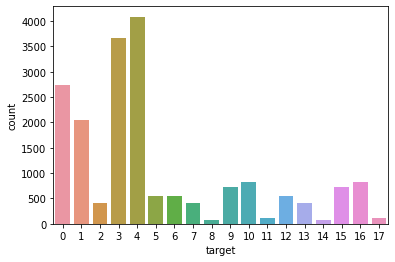

In [79]:
sns.countplot(x='target', data=train)
plt.show()

In [80]:
train.to_csv(os.path.join(train_dir, 'train_with_label.csv'), index=False)